In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 문제 해결
# matplotlib는 한글폰트를 지원하지 않음
# is정보
import platform
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline
# uniccode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #os 가 mac일때
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
else:
    print("Unknown system")

In [3]:
clien=pd.read_csv('./clien.csv')

In [4]:
clien.head()

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,설명,holiday
0,0,모공,요즘 신천지 찌라시 근황,0,미나미모리마치,380,2019-12-28 16:31:51,14437898,Y,380,2019-12-28,2019,12,28,16,31,51,5,NaN,1
1,0,모공,조선판 위쳐가 나오면 무슨 느낌일까요?,4,CODE,149,2019-12-28 16:30:48,14437895,Y,149,2019-12-28,2019,12,28,16,30,48,5,NaN,1
2,0,모공,김용민 트윗 근황.jpg,0,umberto_eco,831,2019-12-28 16:30:07,14437894,Y,831,2019-12-28,2019,12,28,16,30,7,5,NaN,1
3,0,모공,올해 극장에서 재밌게 본 영화들.jpg,6,아하라라,450,2019-12-28 16:28:52,14437890,Y,450,2019-12-28,2019,12,28,16,28,52,5,NaN,1
4,10,모공,남친을 오너일가로 장가보낸썰 풉니다,0,곰삭은푸,1231,2019-12-28 16:27:11,14437889,Y,1231,2019-12-28,2019,12,28,16,27,11,5,NaN,1


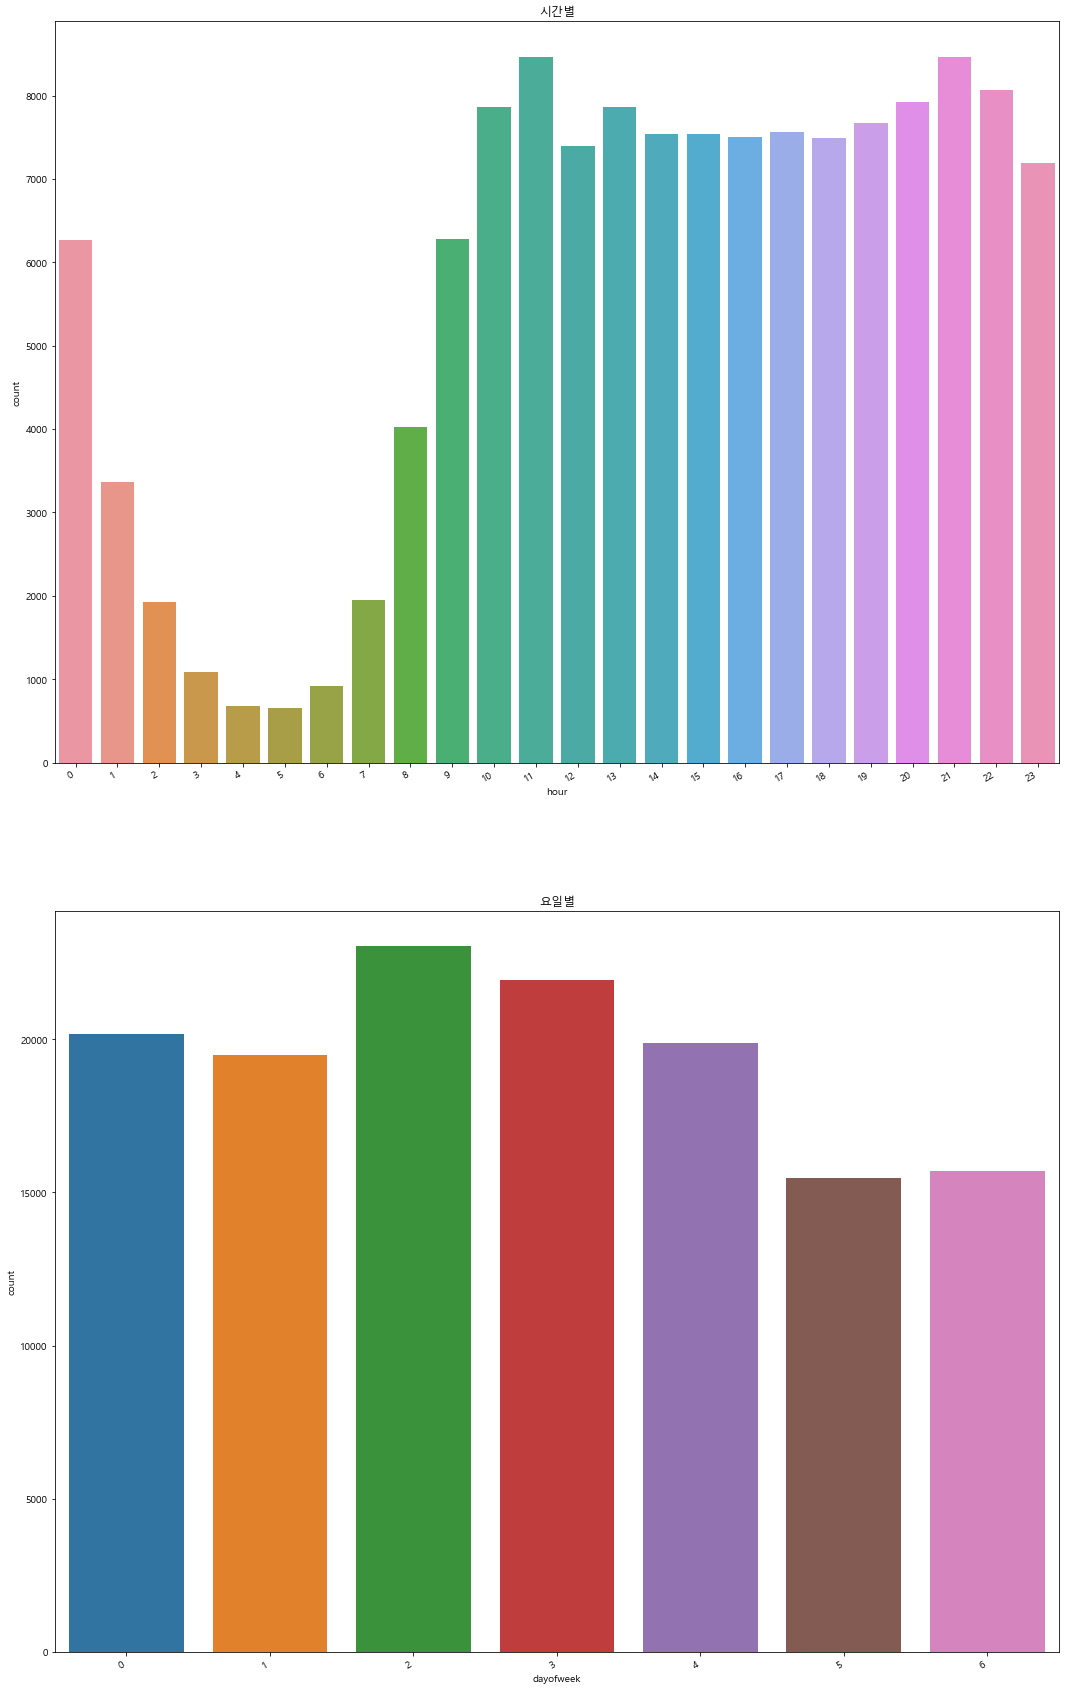

In [5]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,30)

# train data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right') # x축 글자
axes[0].set(ylabel='Count', title='시간별')
sns.countplot(data=clien, x='hour', ax=axes[0])

#test data
plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='요일별')
sns.countplot(data=clien, x='dayofweek', ax=axes[1])


21시가 글리젠이 제일 많이 되고 있음
11시와 22시가 그다음을 달리고 있음
대체로 10시부터 23시까지는 크게 차이가 나지 않는다.

아침에 업무를 대략 정리하고 점심먹기전 잠깐 글을 쓰는 경우나
퇴근후에 저녁을 먹고 글을 쓰는 경우 때문에 그렇다

대체적으로 월~금까지는 글 리젠수가 비슷하나 목요일이 약간 높은 경향을 나타냄

토요일 일요일은 다른날에 비해 3/4정도 밖에 안됨






In [6]:
jan = clien[clien['month']==1]
dec = clien[clien['month']==12]

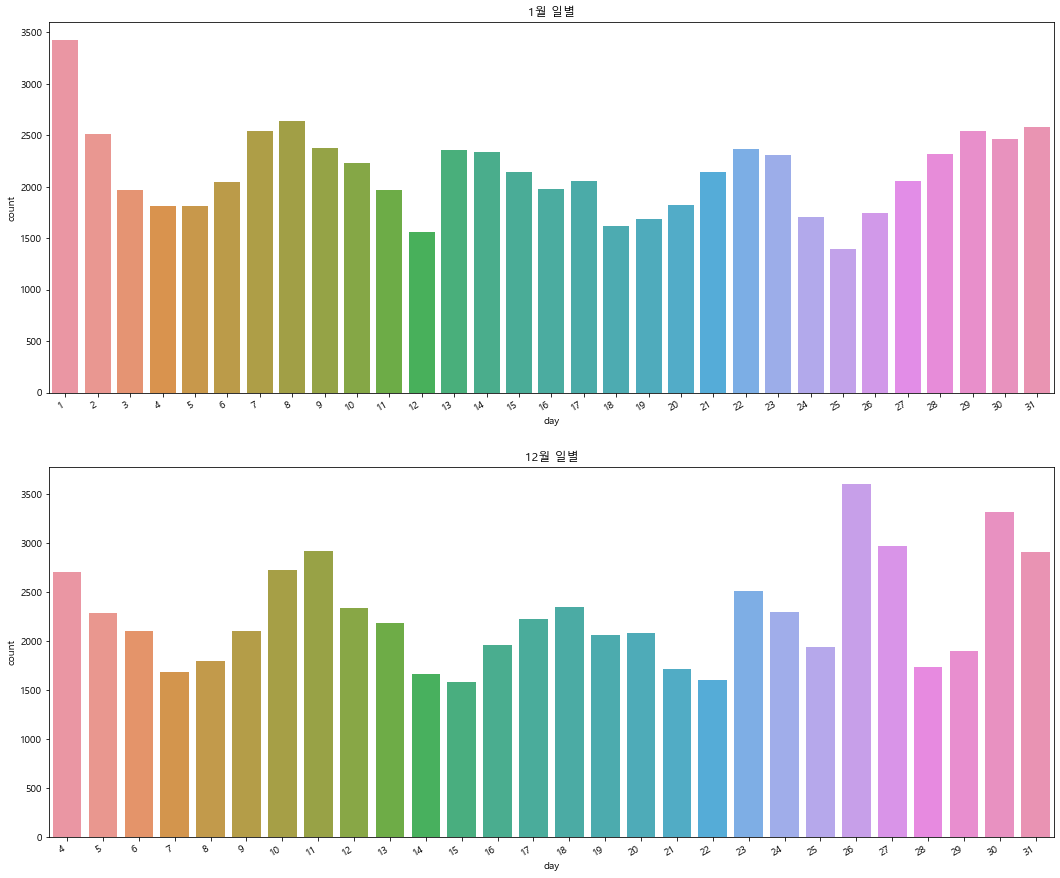

In [7]:
# 다른월의 날짜가 같은것보다는 공휴일 여부가 더 영향을 미칠것 같으므로
# 날짜별 그래프는 월별로 보기로 한다
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,15)

#test data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count', title='1월 일별')
sns.countplot(data=jan, x='day', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='12월 일별')
sns.countplot(data=dec, x='day', ax=axes[1])

1월은 명절 휴일일 24,25,26,27의 글 리젠이 상대적으로 적다 특히 25일은 처참한 정도
1월 1일은 특이사항으로 엄청 높다 (신년축하)
3,4,5 금토일

12월
위에와 마찬가지로 12.28,29 토일등의 리젠수가 적다
특이점으로 26일리젠수가 높다


금요일, 크리스마스 전날인 경우엔 글리젠이 적고 크리스마스 후에는 글리젠이 많다.    
금요일이나, 공휴일 전에는 다음날 쉬는 이점이 있으므로 저녁 약속을 잡아 그런것 같다    
(몇시부터 적어지기 시작하는지 체크 - 평일과 함께 체크)     

In [8]:
clien.describe()

,추천수,리플수,문서번호,조회수int,year,month,day,hour,minute,second,dayofweek,holiday
count,135679.000000,135679.000000,1.356790e+05,135679.000000,135679.000000,135679.000000,135679.000000,135679.000000,135679.00000,135679.000000,135679.000000,135679.000000
mean,5.167329,5.015507,1.445717e+07,3419.717768,2019.533649,6.173085,16.157976,14.107017,29.51445,29.467397,2.818918,0.297017
std,23.539666,11.405724,5.758885e+04,5981.566722,0.498868,5.450787,9.222295,6.211937,17.35564,17.355381,1.921743,0.456946
min,0.000000,0.000000,1.435618e+07,21.000000,2019.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.440778e+07,958.000000,2019.000000,1.000000,8.000000,10.000000,14.00000,14.000000,1.000000,0.000000
50%,0.000000,0.000000,1.445709e+07,1830.000000,2020.000000,2.000000,16.000000,15.000000,30.00000,29.000000,3.000000,0.000000
75%,2.000000,6.000000,1.450723e+07,3388.000000,2020.000000,12.000000,24.000000,19.000000,45.00000,45.000000,4.000000,1.000000
max,1059.000000,463.000000,1.455625e+07,171800.000000,2020.000000,12.000000,31.000000,23.000000,59.00000,59.000000,6.000000,1.000000


최다 추천수는 1059개     
중위값은 0     
평균은 5개     

최다 리플은 463개     
중위값은 0     
평균은 5개     

최다 조회수는 17만회     
중위값은 1830회     
평균은 3419회 로 요약이 가능하다     


In [9]:
perday=clien.pivot_table('조회수int',index = "hour", columns = 'dayofweek',aggfunc='mean')

In [10]:
perday.columns = ['월','화','수','목','금','토','일']

In [11]:
perday

,월,화,수,목,금,토,일
hour,,,,,,,
0,3740.419956,3556.887825,2520.544282,3582.254882,3050.692478,3849.940160,3972.979665
1,4347.247788,4524.930023,4389.785106,4481.489960,4367.702000,4880.967742,5723.561837
2,4703.436578,4112.597173,4376.594502,5022.735632,4523.957082,6285.309237,5773.826415
3,6765.807487,5570.012821,5596.668790,5222.054264,6613.338462,5411.838028,4585.582418
4,7617.109890,6422.049383,5911.554545,5807.252525,6402.080000,7129.517647,5843.389381
5,7828.391304,9281.540000,7866.641026,7061.882979,9932.318681,7904.064516,9106.372093
6,9903.715517,6804.072464,6394.268750,8588.452381,7342.729032,8802.539216,9835.228916
7,7515.033457,6307.475783,6364.455056,7343.244224,7442.358491,6995.333333,9561.739130
8,6197.556738,4085.135447,4074.395380,4543.206128,5222.394612,6302.201005,7269.917563


In [12]:
perday['ind'] = perday.index

In [13]:
perday_melted = pd.melt(perday, id_vars = ['ind'])
perday_melted

,ind,variable,value
0,0,월,3740.419956
1,1,월,4347.247788
2,2,월,4703.436578
3,3,월,6765.807487
4,4,월,7617.109890
...,...,...,...
163,19,일,3819.806806
164,20,일,3702.493621
165,21,일,3736.785241
166,22,일,3754.377322


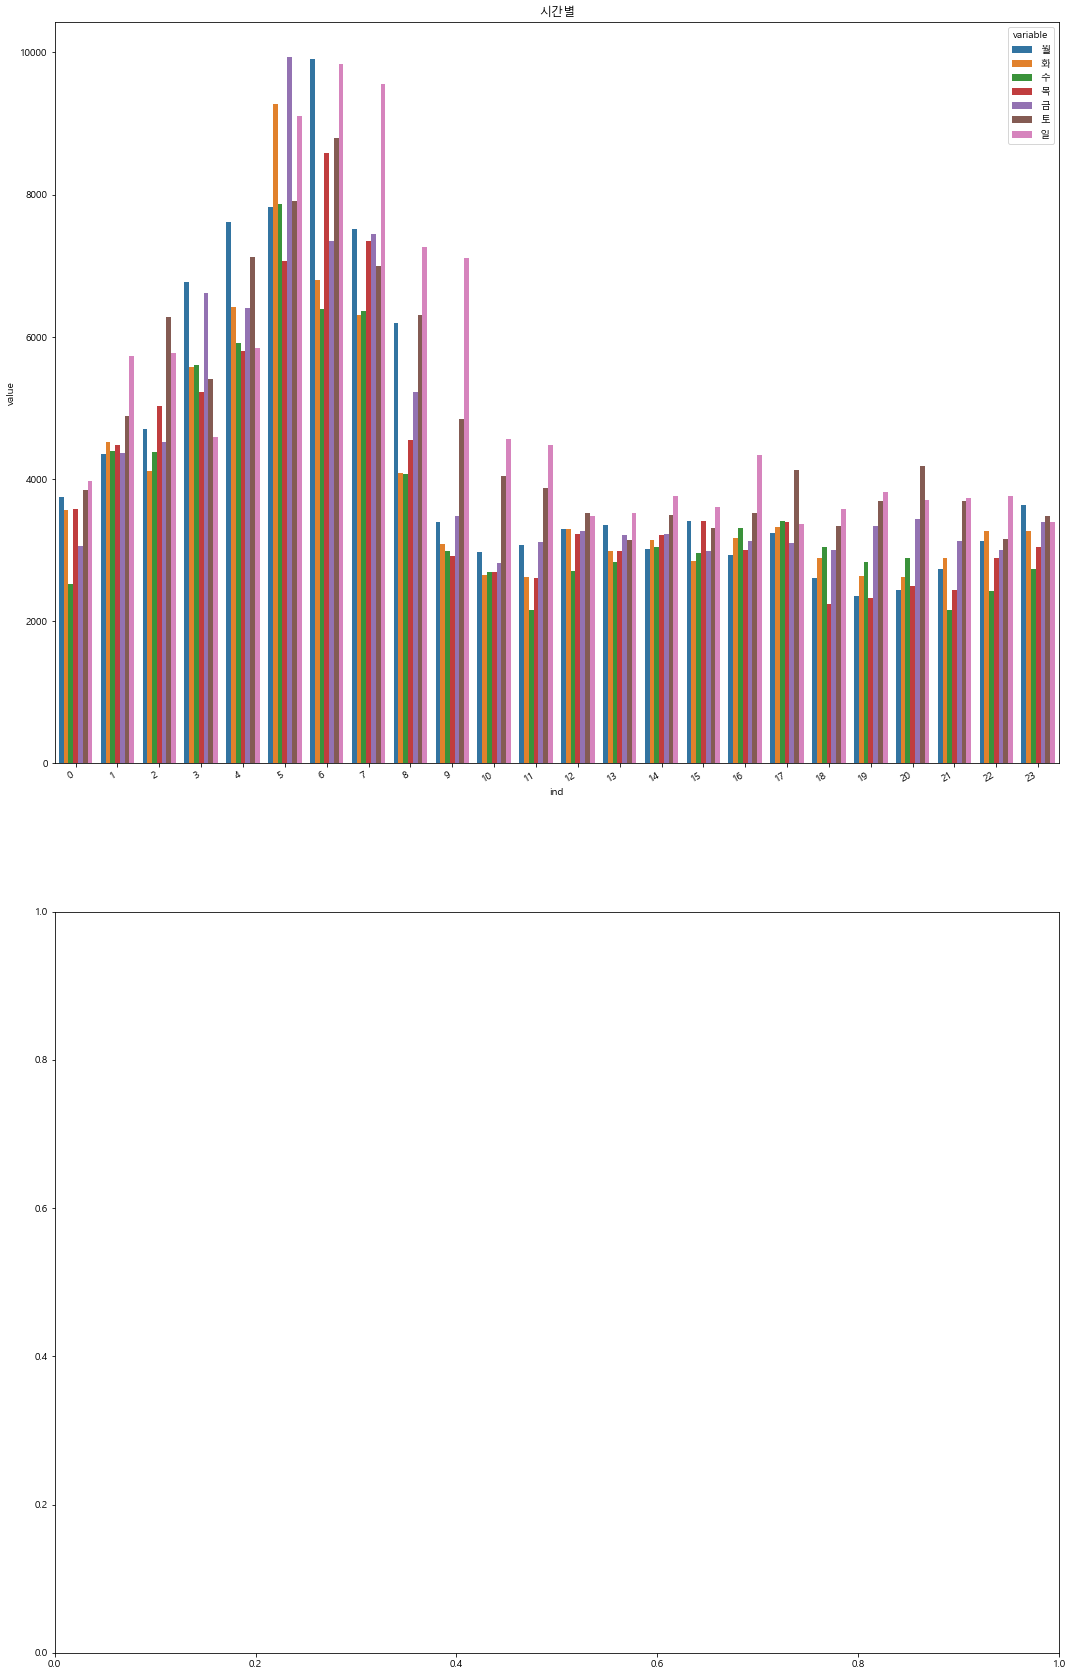

In [14]:
### 멜트해서 hue로 나눠야함???

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,30)

# train data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right') # x축 글자
axes[0].set(ylabel='Count', title='시간별')
sns.barplot(perday_melted['ind'],perday_melted['value'], data = perday_melted, hue='variable', ax=axes[0])


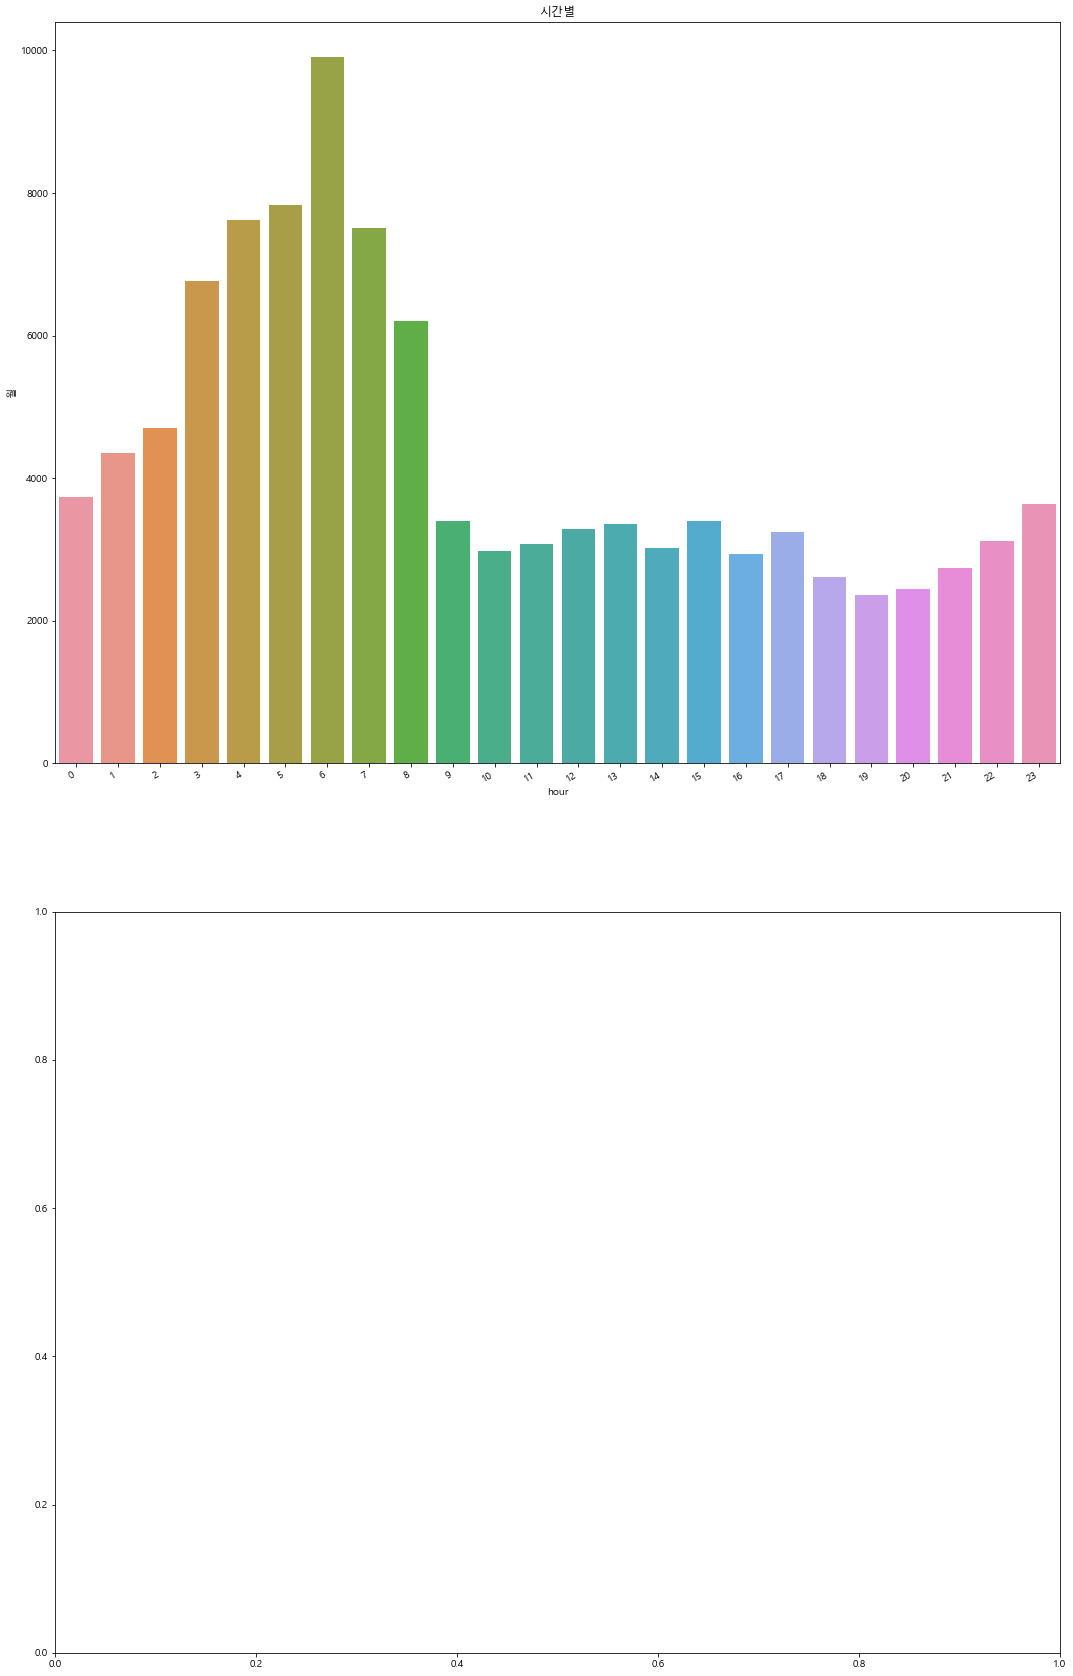

In [15]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,30)

# train data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right') # x축 글자
axes[0].set(ylabel='Count', title='시간별')
sns.barplot(perday.index, perday['월'], ax=axes[0])


IndexError: index 8 is out of bounds for axis 0 with size 8

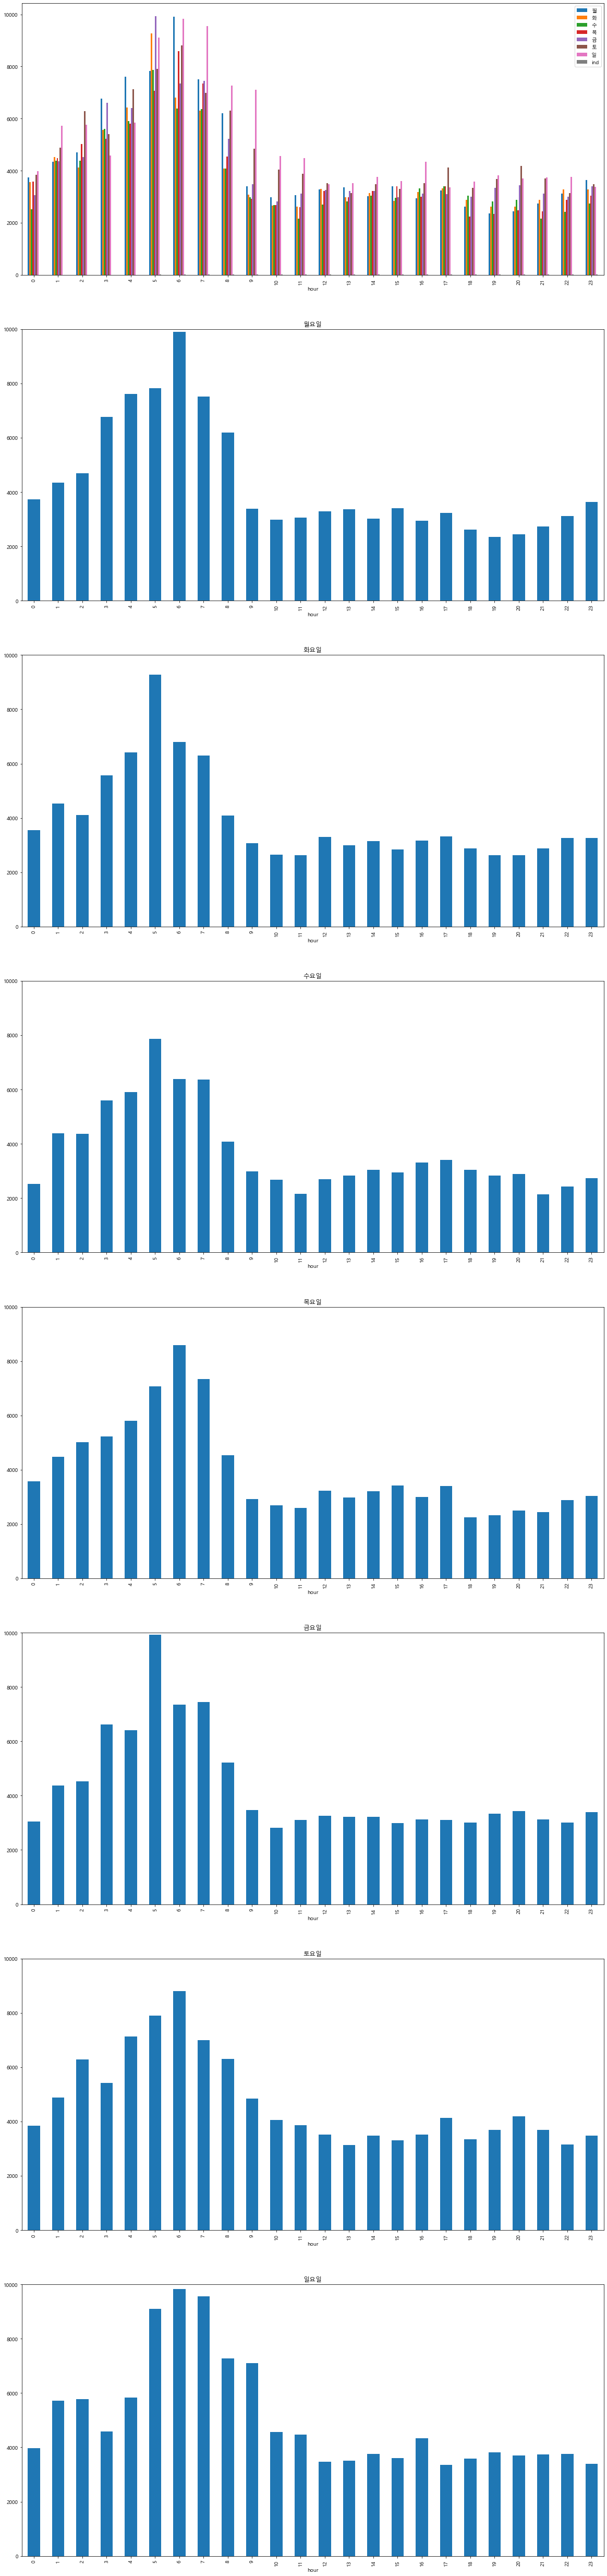

In [16]:
# fig, axes = plt.subplots(8,1, figsize = (20,90))
# axes
# axes[0].plot(perday)
# # for i in range(len(perday.columns)):
# #     axes[i,0].plot(kind='bar')
# for i in range(len(perday.columns)):
#     axes[int(i)+(1)].plot(perday.iloc[:,i])

# 위와 아래는 동일함
# 아래대로 써야 타입이랑 바꿔주기 쉽다






fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1], kind = 'bar',ylim =(0,10000) ,title = str(perday.columns[i])+"요일")
    

신기하게도 5~7사이에 쓴글들이 대체로 조회수가 높다
글을 쓴 시점과 읽는 시간과는 차이가 있을수 있으므로
새벽에 쓴글들이 유저들이 아침에 일어났을때 처음으로 접하게 되는 글이다
5,6,7시는 글 리젠이 적어서 몇페이지가 안되기때문에 상대적으로 읽어보기가 쉽다

In [ ]:
perday=cliennojan1.pivot_table('추천수',index = "hour", columns = 'dayofweek',aggfunc='mean')
perday.columns = ['월','화','수','목','금','토','일']

In [ ]:
perday

IndexError: index 8 is out of bounds for axis 0 with size 8

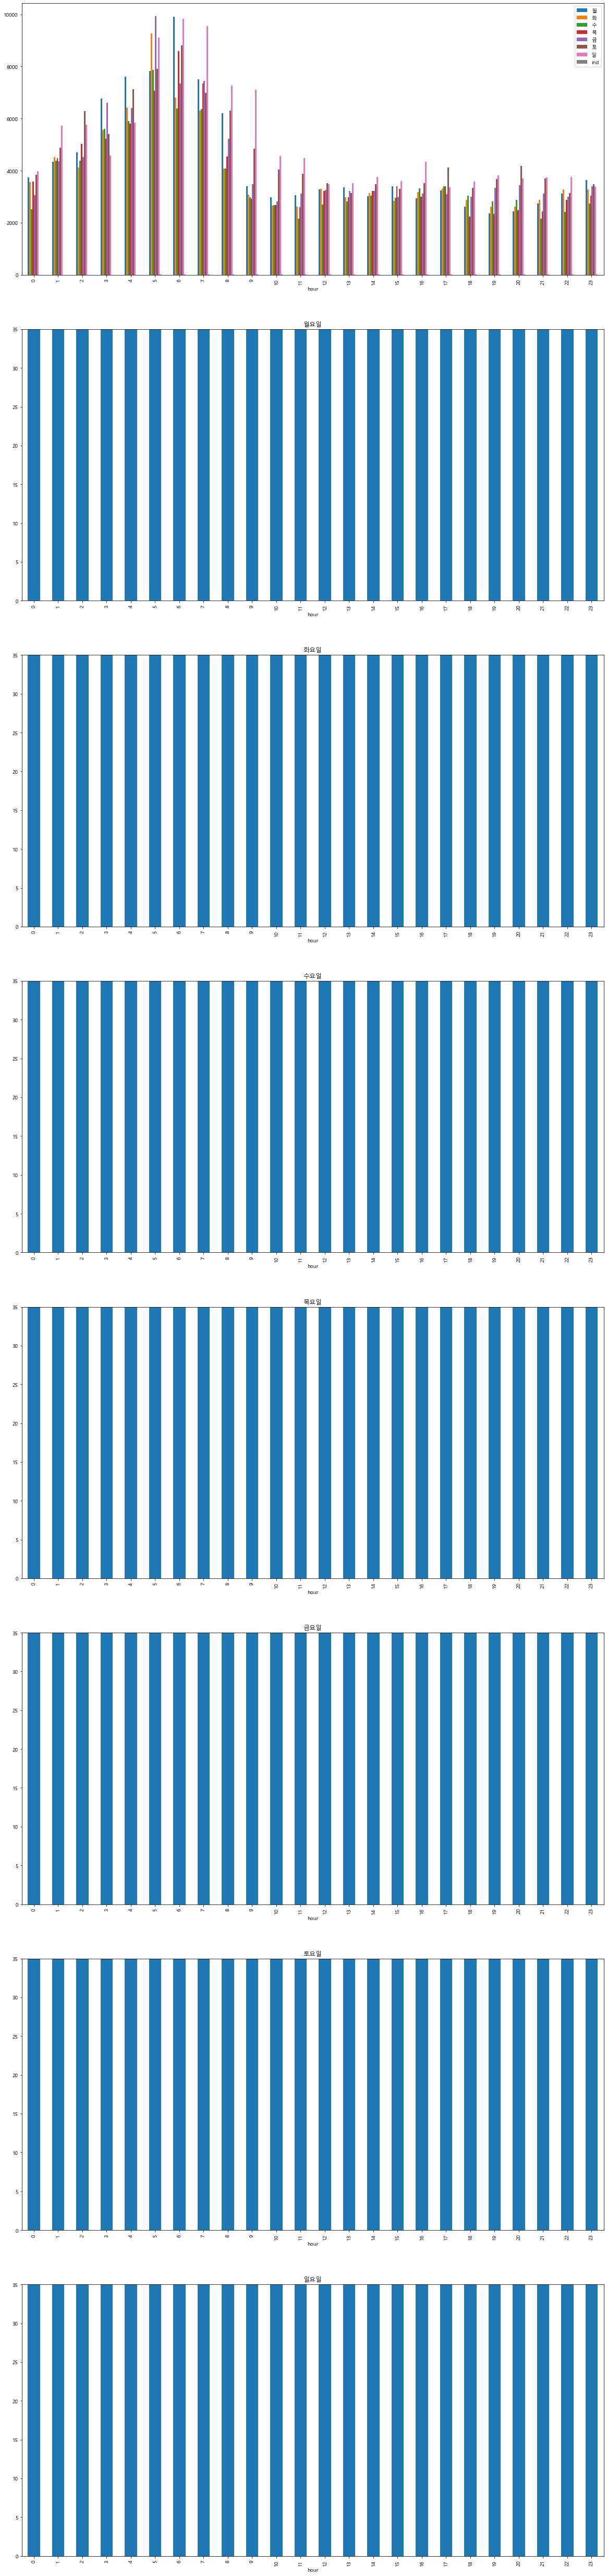

In [17]:
fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1], kind = 'bar',ylim =(0,35) ,title = str(perday.columns[i])+"요일")
    

추천도 역시 5,6,7시가 많다

In [ ]:
clien

In [ ]:
perday=clien.pivot_table('리플수',index = "hour", columns = 'dayofweek',aggfunc='mean')

IndexError: index 8 is out of bounds for axis 0 with size 8

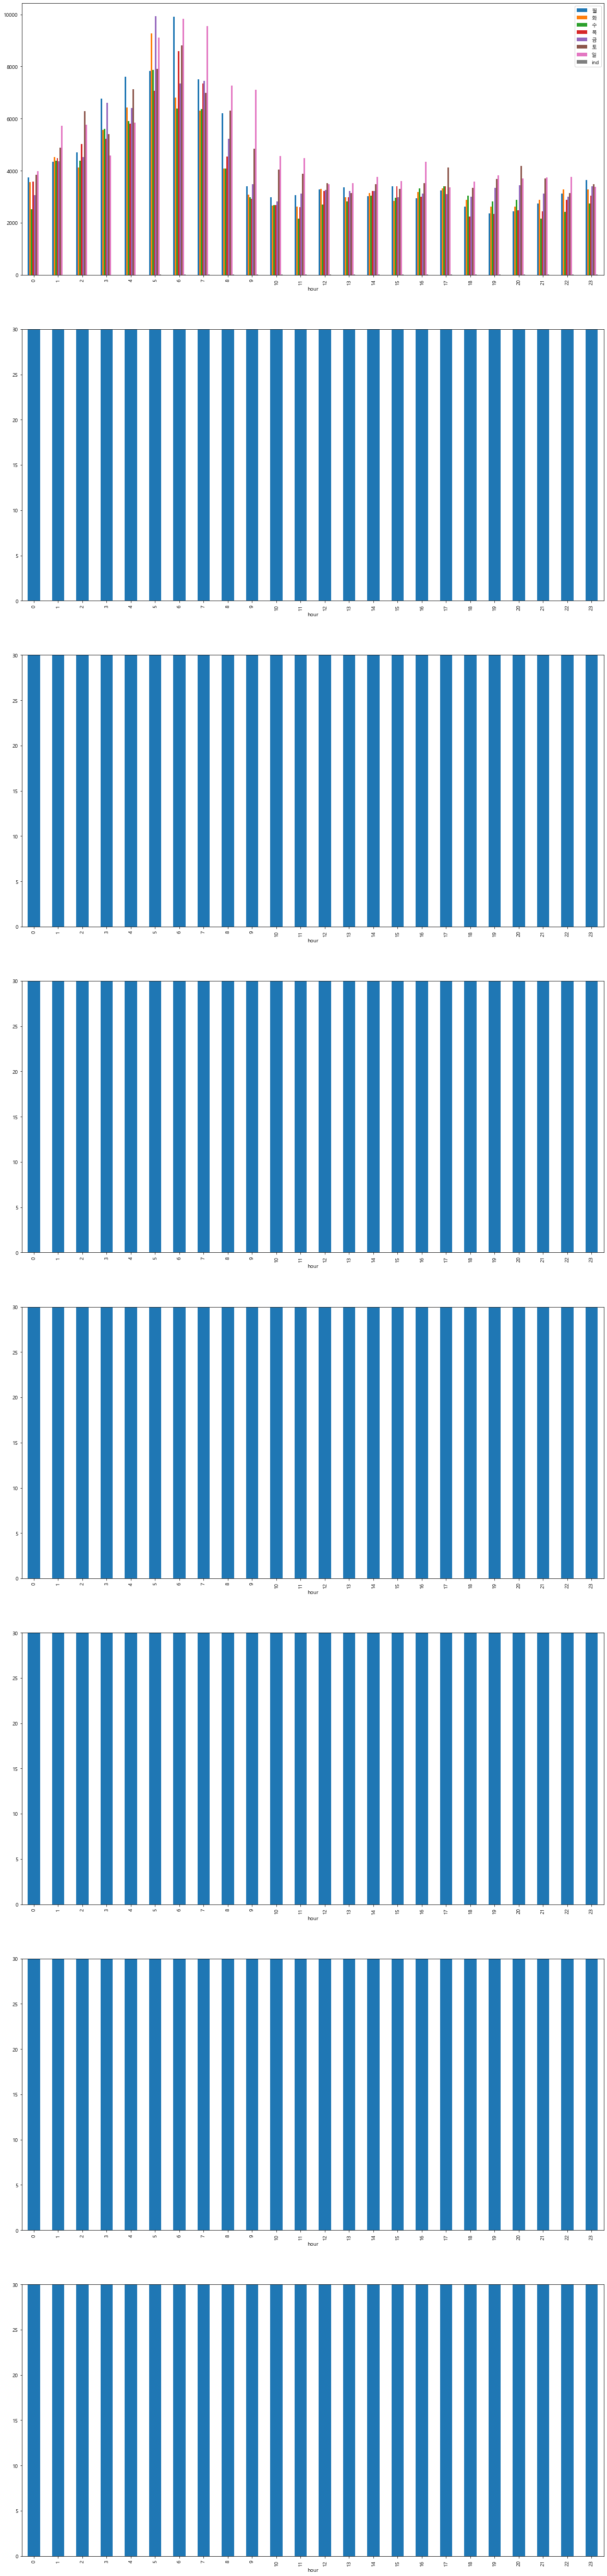

In [18]:
# fig, axes = plt.subplots(8,1, figsize = (20,90))
# axes
# axes[0].plot(perday)
# # for i in range(len(perday.columns)):
# #     axes[i,0].plot(kind='bar')
# for i in range(len(perday.columns)):
#     axes[int(i)+(1)].plot(perday.iloc[:,i])

# 위와 아래는 동일함
# 아래대로 써야 타입이랑 바꿔주기 쉽다
fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1],ylim=(0,30), kind = 'bar')
    

비슷한 양상을 보임
약간의 시간차는 잇지만 5~6 시쯤 올린글에 대해서 
수요일과 금요일 새벽이 리플이 잘 달렸다

In [ ]:
clien.corr()

In [ ]:
clien.loc[clien['사진유무']=="Y","사진유무"] = 1
clien.loc[clien['사진유무']=="N","사진유무"] = 0

In [ ]:
clien[['추천수', '리플수', '사진유무', '조회수int','dayofweek', 'holiday']].corr()

히트맵

In [19]:
mask = np.array(clien[['추천수', '리플수', '사진유무', '조회수int','dayofweek', 'holiday']].corr())
mask[np.tril_indices_from(mask)] = False #array의 1 값을 기준으로 상위부분 출력제외

mask

array([[ 0.00000000e+00,  7.01698041e-03,  5.62820946e-01,
        -6.83545230e-03, -1.43738352e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.42052040e-02,
        -4.12925876e-04, -1.69346309e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.77532723e-02,  5.80408267e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.33719480e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

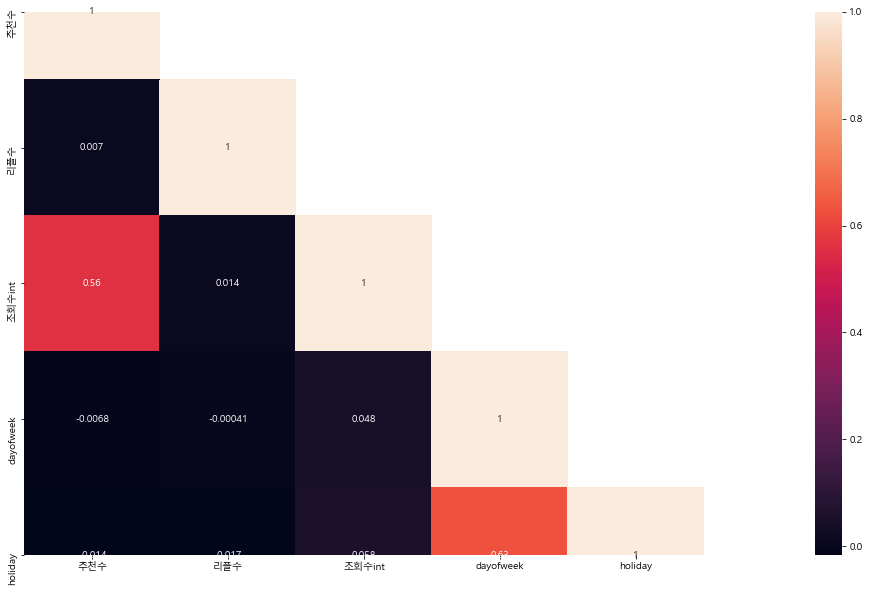

In [20]:
# 상관계수의 Heatmap
fig, ax = plt.subplots()
fig.set_size_inches(40,10)
sns.heatmap(clien[['추천수', '리플수', '사진유무', '조회수int','dayofweek', 'holiday']].corr(), 
            mask = mask, vmax=1, square=True, annot=True )


### 조회수와 추천수에 상관관계가 있고
### 그 다음은 휴일 여부 이다
### 어그로를 끌기 위해서는 날짜, 시간을 맞춰 조회수를 올리는것이 유효하다
## 의외로 사진유무는 크게 중요하지가 않다

In [21]:
clienSorted = clien.sort_values('조회수int',ascending=False)

In [22]:
clienSorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135679 entries, 9227 to 9
Data columns (total 20 columns):
추천수          135679 non-null int64
게시판          135679 non-null object
제목           135679 non-null object
리플수          135679 non-null int64
아이디          135679 non-null object
조회수          135679 non-null object
날짜           135679 non-null object
문서번호         135679 non-null int64
사진유무         135679 non-null object
조회수int       135679 non-null int64
date         135679 non-null object
year         135679 non-null int64
month        135679 non-null int64
day          135679 non-null int64
hour         135679 non-null int64
minute       135679 non-null int64
second       135679 non-null int64
dayofweek    135679 non-null int64
설명           12270 non-null object
holiday      135679 non-null int64
dtypes: int64(12), object(8)
memory usage: 21.7+ MB


In [23]:
#상위 10%글 틱징 분석
clien10 = clienSorted.loc[:13567,]

In [24]:
# 제일 많이 올린사람 
# 제일 많이 언급된 키워드
idCount =clien10.groupby('아이디').아이디.count()

In [25]:
idCount=pd.DataFrame(idCount)

In [26]:
idCount.columns = ['count']

In [27]:
idCount.sort_values('count',ascending=False)

,count
아이디,
파이랜,967
외선이,611
아름다워용,528
줏엉,462
거_미,431
...,...
노오올자,1
노잉,1
노코멘트,1


In [28]:
clien[clien['아이디']=='파이랜']

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,설명,holiday
193,12,모공,사기나 횡령은 크게 해야되는 이유.jpg,8,파이랜,6708,2019-12-28 14:16:35,14437555,N,6708,2019-12-28,2019,12,28,14,16,35,5,NaN,1
199,4,모공,배텐 출연한 김민아.gif,3,파이랜,9319,2019-12-28 14:13:25,14437549,N,9319,2019-12-28,2019,12,28,14,13,25,5,NaN,1
203,0,모공,김민아 아나운서 이상형.jpg,7,파이랜,7536,2019-12-28 14:10:06,14437538,N,7536,2019-12-28,2019,12,28,14,10,6,5,NaN,1
210,1,모공,(후방) 셀카 ㅊㅈ.jpg,0,파이랜,8831,2019-12-28 14:07:30,14437531,Y,8831,2019-12-28,2019,12,28,14,7,30,5,NaN,1
227,1,모공,(후방) 크리스마스의 유부녀.jpg,14,파이랜,10.1 k,2019-12-28 13:59:28,14437509,Y,10100,2019-12-28,2019,12,28,13,59,28,5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134420,6,모공,오늘자 신재은 악플러 상황.jpg,0,파이랜,15.2 k,2019-12-28 22:14:40,14438782,N,15200,2019-12-28,2019,12,28,22,14,40,5,NaN,1
134454,1,모공,(후방) 메불메 갈리는 ㅊㅈ.jpg,6,파이랜,28.8 k,2019-12-28 21:48:27,14438727,N,28800,2019-12-28,2019,12,28,21,48,27,5,NaN,1
134741,3,모공,잔망 대결하는 정연과 나연.gif,4,파이랜,6183,2019-12-28 19:02:12,14438289,N,6183,2019-12-28,2019,12,28,19,2,12,5,NaN,1
134817,1,모공,(후방) 여교사 코스프레 ㅊㅈ.jpg,1,파이랜,23.2 k,2019-12-28 18:30:47,14438192,N,23200,2019-12-28,2019,12,28,18,30,47,5,NaN,1


In [29]:
clien[clien['아이디']=='외선이']

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,설명,holiday
44,0,모공,호랑이 땅콩.gif,0,외선이,2272,2019-12-28 16:02:48,14437824,N,2272,2019-12-28,2019,12,28,16,2,48,5,NaN,1
77,5,모공,새끼 왈라비(?).gif,0,외선이,3041,2019-12-28 15:43:17,14437768,Y,3041,2019-12-28,2019,12,28,15,43,17,5,NaN,1
83,2,모공,내가 타이저 우즈 거든.gif,1,외선이,3143,2019-12-28 15:39:02,14437758,Y,3143,2019-12-28,2019,12,28,15,39,2,5,NaN,1
102,4,모공,은근히 자존감과 자존심을 헷갈리는 분들을 많이 봤어요.,10,외선이,1272,2019-12-28 15:27:57,14437728,N,1272,2019-12-28,2019,12,28,15,27,57,5,NaN,1
301,44,모공,신박한 강아지 입마개 사용법.jpg,6,외선이,7668,2019-12-28 13:03:52,14437381,Y,7668,2019-12-28,2019,12,28,13,3,52,5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134646,4,모공,"아버지와 나 PART 3.avi(신해철, 이승환, 하현우, 유재석)",0,외선이,1097,2019-12-28 19:55:24,14438427,N,1097,2019-12-28,2019,12,28,19,55,24,5,NaN,1
134765,0,모공,(스포)넷플릭스 '너의 모든것 ' 뭔가 멘탈 터지는 작품이네요.,0,외선이,1997,2019-12-28 18:51:19,14438258,N,1997,2019-12-28,2019,12,28,18,51,19,5,NaN,1
134910,1,모공,이거 알면 아재(2).jpg(이미지펌),0,외선이,2140,2019-12-28 17:27:59,14438043,N,2140,2019-12-28,2019,12,28,17,27,59,5,NaN,1
134965,0,모공,"망한 영화 한석규, 천우희의 우상 이동진 평점.jog",0,외선이,4942,2019-12-28 16:52:11,14437955,N,4942,2019-12-28,2019,12,28,16,52,11,5,NaN,1


## 확장자를 무조건 붙여야 한다. gif .jpg .avi등이 유효하다
## 사진유무와는 관계 없지만 사진이 들어갔다고 표시된 글들의 조회수가 높다
## 클리앙 인터페이스상 사진 유무를 확인하기가 어려우므로 이러한 현상이 발생

In [30]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt
from wordcloud import WordCloud
t = Okt()
import matplotlib.pyplot as plt
%matplotlib inline


In [31]:
clien10

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,설명,holiday
9227,1059,모공,"(내용 2차 추가) 분당구 닭강정 사건, 학폭이 아니라 범죄였습니다.",0,헤바닐리,171.8 k,2019-12-25 01:39:41,14424677,Y,171800,2019-12-25,2019,12,25,1,39,41,2,크리스마스,1
9482,449,모공,(분당구 수내동) 닭강정을 무료로 드립니다,0,헤바닐리,143.4 k,2019-12-24 22:47:24,14424322,N,143400,2019-12-24,2019,12,24,22,47,24,1,NaN,0
131357,41,모공,위기의 백종원.gif,45,25th,110.8 k,2019-12-30 13:02:08,14443429,Y,110800,2019-12-30,2019,12,30,13,2,8,0,NaN,0
68307,188,모공,대한항공 베테랑 승무원들이 자원했다는군요,0,Riverside,109.0 k,2020-01-28 15:25:08,14535081,N,109000,2020-01-28,2020,1,28,15,25,8,1,NaN,0
57452,5,모공,현 코스트코 마스크상황...,0,llollollolloll,103.3 k,2020-02-02 07:57:40,14550863,N,103300,2020-02-02,2020,2,2,7,57,40,6,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85154,0,모공,위에서 왜이렇게 쉽게 내려와요 ㅋㅋㅋ,0,뭐하자는건지,3245,2020-01-19 22:38:44,14510879,N,3245,2020-01-19,2020,1,19,22,38,44,6,NaN,1
6636,0,모공,테슬라 사이버트럭 차박 되는군요,7,타시터스킬고어,3245,2019-12-26 12:21:21,14428622,Y,3245,2019-12-26,2019,12,26,12,21,21,3,NaN,0
121879,0,모공,"한국식피자?,딴지펌",10,king_cat,3245,2020-01-02 11:49:38,14456628,N,3245,2020-01-02,2020,1,2,11,49,38,3,NaN,0
129936,60,모공,문재인 대통령 정말 대단한거 같습니다.,0,모두가행복한세상,3245,2019-12-30 19:31:06,14445407,N,3245,2019-12-30,2019,12,30,19,31,6,0,NaN,0


In [32]:
a=""
b = a.join(clien10['제목'])

In [33]:
words = t.nouns(b)

In [34]:
# 불용어 추가
stop_words = ['제','월','일','조','것','이','입','애','정',
              '수','관','때','그','바','위','및','안','장',
             '집','요','전','거','한','후','명','글','말','왜','분','차','저']
words = [each_word for each_word in words if each_word not in stop_words]
words

['내용',
 '추가',
 '분당구',
 '닭강정',
 '사건',
 '학폭',
 '범죄',
 '분당구',
 '수내동',
 '닭강정',
 '무료',
 '위기',
 '백종원',
 '대한항공',
 '베테',
 '승무원',
 '자원',
 '현',
 '코스트코',
 '마스크',
 '상황',
 '현재',
 '강남역',
 '상황',
 '아이유',
 '검소',
 '홍콩',
 '아파트',
 '내부',
 '전자',
 '홍보팀',
 '못',
 '걸',
 '신봉선',
 '실패',
 '돈',
 '대기',
 '후기',
 '휴대폰',
 '구입',
 '프로스펙스',
 '근황',
 '쿠팡',
 '맨',
 '회사',
 '근처',
 '이비인후과',
 '상황',
 '서울',
 '사진',
 '보고',
 '놀란',
 '이유',
 '토이스토리',
 '아이',
 '고양이',
 '최강',
 '미녀',
 '가게',
 '주인',
 '휴업',
 '사유',
 '실화',
 '여고',
 '남자',
 '교생',
 '가면',
 '조금',
 '지하철',
 '타고',
 '멤버',
 '아이돌',
 '사진',
 '보정',
 '양준',
 '서태지',
 '부인',
 '정말',
 '미인',
 '서태지',
 '부인',
 '정말',
 '미인',
 '마침내',
 '승리',
 '깃발',
 '여유',
 '대충',
 '근황',
 '시골',
 '헬스장',
 '현실',
 '김포',
 '사생활',
 '보호',
 '주택',
 '슈가',
 '맨',
 '이소은',
 '편',
 '방청객',
 '카카오',
 '뱅크',
 '인기',
 '이유',
 '이슬람',
 '율법',
 '태호',
 '물어',
 '한국',
 '압도',
 '세계',
 '위인',
 '샾',
 '이지혜',
 '근황',
 '샤를',
 '리즈',
 '테론',
 '근황',
 '베트남',
 '한국',
 '딸기',
 '가격',
 '결혼',
 '포기',
 '청춘',
 '남자',
 '운동',
 '이유',
 '독자',
 '보유',
 '유투',
 '버',
 '클라스',
 '남자',
 '혼자',
 '괌',
 '

In [35]:
# 상위 50개 단어 확인
ko = nltk.Text(words)
ko.vocab().most_common(50)

[('근황', 1128),
 ('후방', 816),
 ('이유', 815),
 ('한국', 787),
 ('검찰', 662),
 ('오늘', 612),
 ('일본', 608),
 ('펌', 544),
 ('우한', 526),
 ('사람', 519),
 ('중국', 499),
 ('진짜', 455),
 ('장관', 389),
 ('속보', 388),
 ('사진', 385),
 ('추미애', 381),
 ('조국', 363),
 ('미국', 357),
 ('요즘', 299),
 ('윤석열', 299),
 ('검사', 294),
 ('여자', 285),
 ('폐렴', 284),
 ('민주당', 276),
 ('대통령', 273),
 ('돈', 270),
 ('코로나', 266),
 ('정말', 264),
 ('진중권', 260),
 ('인사', 259),
 ('중', 256),
 ('뉴스', 255),
 ('남자', 252),
 ('사건', 250),
 ('생각', 241),
 ('가장', 232),
 ('상황', 229),
 ('마스크', 227),
 ('회사', 224),
 ('관련', 223),
 ('보고', 216),
 ('교수', 216),
 ('논란', 209),
 ('주의', 208),
 ('지금', 207),
 ('법', 203),
 ('의원', 203),
 ('고양이', 202),
 ('결혼', 198),
 ('아파트', 197)]

In [36]:
# 상위 500개만  word cloud 로 그리기
data = ko.vocab().most_common(1000)
tmp_data = dict(data)

In [37]:
# 지도에 표시
from PIL import Image
import numpy as np
Korea_coloring = np.array(Image.open('./logo3.png'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(Korea_coloring)

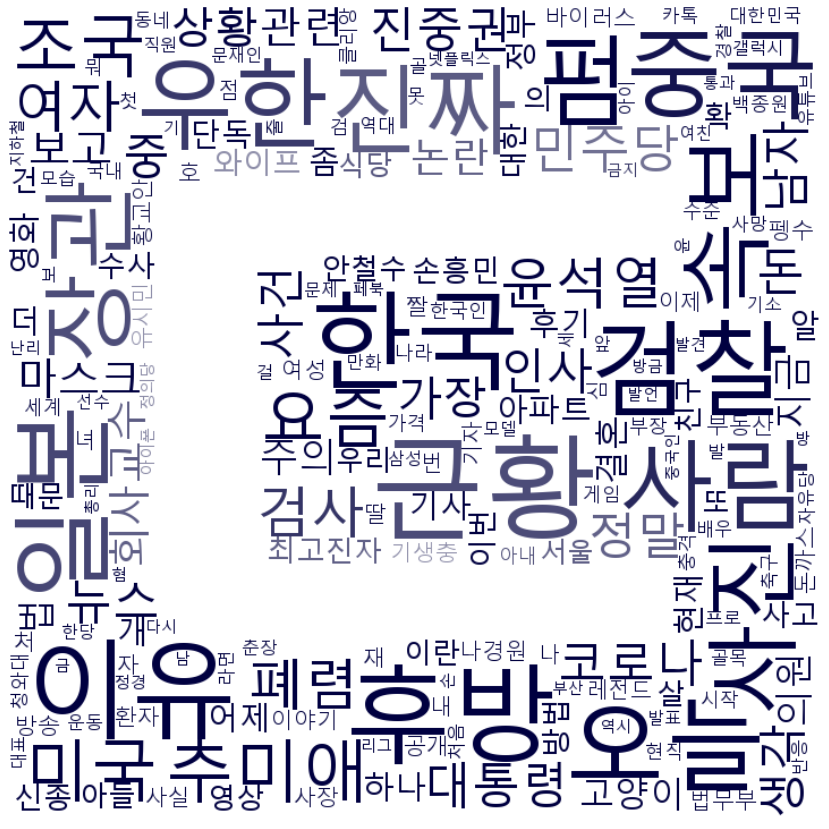

In [38]:
wordcloud = WordCloud(background_color="White",
                     font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.2,
                     mask=Korea_coloring,
                     min_font_size=1,
                     max_font_size=100,
                      width = 1600,
                      height = 800
                     ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()